In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

# YOLO

In [ ]:
from ultralytics import YOLO

In [ ]:
yolo = "/content/yolov8n.pt"


In [ ]:
# Load a model
model = YOLO(yolo)  # load a pretrained model (recommended for training)

In [ ]:
# Predict with the model
results = model("/content/Captura de pantalla 2024-06-06 184445.png")  # predict on an image


image 1/1 /content/Captura de pantalla 2024-06-06 184445.png: 192x640 1 sports ball, 111.6ms
Speed: 2.2ms preprocess, 111.6ms inference, 8.9ms postprocess per image at shape (1, 3, 192, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
import cv2

In [ ]:
# Load the original image
image = results.orig_img

In [ ]:
results = results[0]
for box in results.boxes:
  x1, y1, x2, y2 = box.xyxy.tolist()[0]  # Obtenemos las coordenadas de la caja
  conf = box.conf.item()  # Obtenemos la confianza
  class_id = int(box.cls.item())  # Obtenemos el ID de la clase

  # Dibujamos la caja de detección en la imagen
  color = (0, 255, 0)  # Color verde
  label = f"Clase {class_id} - Confianza: {conf:.2f}"  # Etiqueta con la clase y la confianza
  cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)  # Dibujamos la caja
  cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)  # Dibujamos la etiqueta

# # Save the image with bounding boxes
cv2.imwrite("/content/detected_image.png", image)

True

# Modelo AIM


In [1]:
import tensorflow as tf
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.16.1


In [5]:
! pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.0 MB 491.5 kB/s eta 0:00:23
    --------------------------------------- 0.2/11.0 MB 510.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.0 MB 510.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.0 MB 392.8 kB/s eta 0:00:28
    --------------------------------------- 0.2/11.0 MB 412.5 kB/s eta 0:00:27
    --------------------------------------- 0.2/11.0 MB 406.9 kB/s eta 0:00:27
    --------------------------------------- 0.2/11.0 MB 406.9 kB/s eta 0:00:27

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/anton/OneDrive/Escritorio/Titulos/TFG/PRUEBA_AIM/datos_aim_lab.csv')

In [9]:
df

,box_x1,box_y1,box_x2,box_y2,area,mouse_final
0,436,182,530,278,9024,"[-1, 0]"
1,351,24,443,119,8740,"[-87, -158]"
2,479,308,578,408,9900,"[45, 128]"
3,762,68,868,157,9434,"[331, -116]"
4,154,281,273,388,12733,"[-271, 105]"
...,...,...,...,...,...,...
886,280,225,384,325,10400,"[-152, 45]"
887,1,77,102,172,9595,"[-432, -104]"
888,398,220,471,293,5329,"[-49, 27]"
889,398,220,471,293,5329,"[-49, 27]"


In [3]:
# Dividir en características y variable objetivo
X = df.drop('mouse_final', axis=1)  # Características
y = df['mouse_final']  # Variable objetivo

In [4]:
# Primero, dividir el DataFrame en conjuntos de entrenamiento+validación y prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Luego, dividir el conjunto de entrenamiento+validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [5]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_val:", X_val.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_val:", y_val.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (534, 5)
Tamaño de X_val: (178, 5)
Tamaño de X_test: (179, 5)
Tamaño de y_train: (534,)
Tamaño de y_val: (178,)
Tamaño de y_test: (179,)


In [6]:
# Convertir DataFrames a matrices NumPy
X_train = X_train.values
X_val = X_val.values

# Convertir Series a matrices NumPy
y_train= y_train.values
y_val = y_val.values

In [7]:
import ast

# Convertir las etiquetas de cadena a formato numérico
y_train = np.array([ast.literal_eval(label) for label in y_train])
y_val = np.array([ast.literal_eval(label) for label in y_val])

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

https://github.com/SnehJain/Deep-Neural-Networks-For-Stock-Price-Prediction/blob/master/TCS/TCS_Stock_Prediction_Using_CNN.ipynb

In [9]:
#OFICIAL
def crear_modelo(num_features):
  model = Sequential()
  model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(num_features,1)))
  model.add(MaxPooling1D(pool_size=1))
  model.add(BatchNormalization())

  model.add(Conv1D(128, kernel_size=3, activation='relu'))
  model.add(MaxPooling1D(pool_size=1))
  model.add(BatchNormalization())

  # Aplanar la salida
  model.add(Flatten())

  #Capas Densas
  model.add(Dense(64, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.2))

  #Capa Salida Regresion
  model.add(Dense(2))

  return model

In [10]:
model = crear_modelo(X_train.shape[1])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Resumen del modelo
model.summary()

c:\Users\anton\.conda\envs\TFG\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,114 (133.26 KB)

 Trainable params: 33,730 (131.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [11]:
# Entrenar el modelo con Early Stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 27595.4980 - val_loss: 27774.7480
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25170.3613 - val_loss: 26416.8145
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23047.0020 - val_loss: 24499.4863
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20843.1113 - val_loss: 21904.7344
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19614.6328 - val_loss: 18854.1660
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14600.9834 - val_loss: 15701.4297
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10617.0977 - val_loss: 14438.7695
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7677.9912 - val_loss: 12816.3711
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6099.0576 - val_loss: 10694.6211
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5374.3438 - val_loss: 8458.1934
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calcular las métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas para el conjunto de validación
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Imprimir las métricas
print("Conjunto de entrenamiento:")
print("MSE:", mse_train)
print("MAE:", mae_train)
print("R^2:", r2_train)
print()
print("Conjunto de validación:")
print("MSE:", mse_val)
print("MAE:", mae_val)
print("R^2:", r2_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Conjunto de entrenamiento:
MSE: 133.11675908892946
MAE: 8.8836296490125
R^2: 0.9947648644447327

Conjunto de validación:
MSE: 130.85145801632044
MAE: 8.871555175674096
R^2: 0.9950712323188782


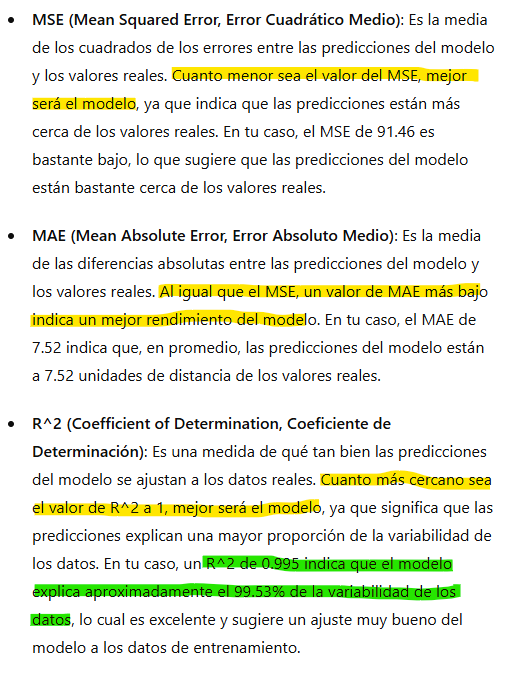

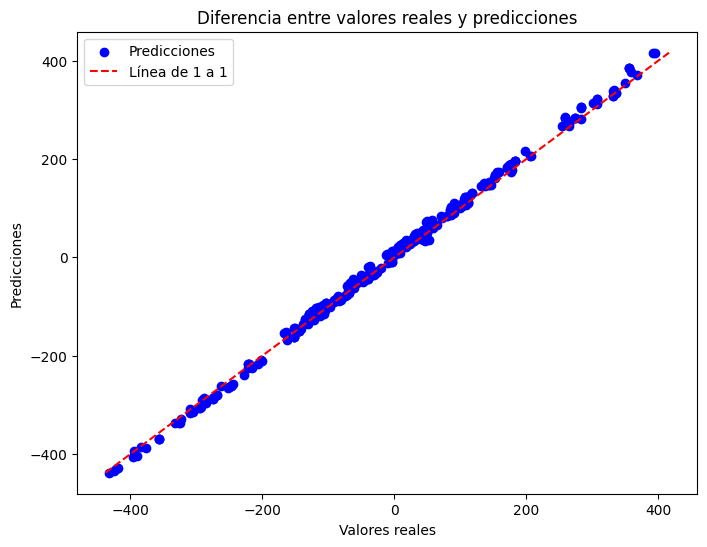

In [21]:
# Calcular los valores mínimos y máximos
min_val = np.min([np.min(y_val), np.min(y_val_pred)])
max_val = np.max([np.max(y_val), np.max(y_val_pred)])

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Predicciones')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Línea de 1 a 1')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diferencia entre valores reales y predicciones')
plt.legend()
plt.show()

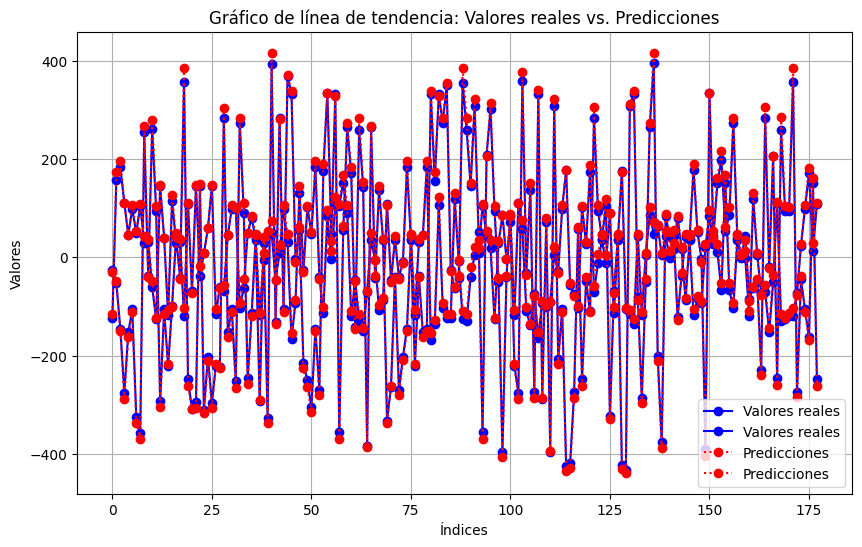

In [22]:
# Crear un rango de índices para el gráfico
indices = range(len(y_val))

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(indices, y_val, marker='o', linestyle='-', color='blue', label='Valores reales')
plt.plot(indices, y_val_pred, marker='o', linestyle=':', color='red', label='Predicciones')
plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('Gráfico de línea de tendencia: Valores reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from keras.models import load_model

# Guardar el modelo
model.save('modelo.h5')

In [15]:
# Exportar a JSON
modelo_json = model.to_json()
with open("modelo.json", "w") as json_file:
    json_file.write(modelo_json)

# Guardar los pesos con el nombre correcto
model.save_weights('pesos_modelo.weights.h5')

# Cargar Modelo


In [ ]:
from keras.models import load_model
import numpy as np

# Cargar el modelo desde un archivo .h5
modelo = load_model('/content/aim_54.71710041309477.h5')

In [ ]:
492,78,590,177,9702,"[57, -102]"

In [ ]:
input_data = np.array([[492,78,590,177,9702]])

# Hacer predicciones con el modelo
predicciones = modelo.predict(input_data)

1/1 [==============================] - 0s 291ms/step


In [ ]:
predicciones[0][1]

-102.05606

In [ ]:
def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}